# Multiple Linear Regression on Rothko art data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
# load the art data
data = pd.DataFrame.from_csv('../../data/data.csv')
data = data[['period','shannon_entropy','mean_color_r','luminance','contrast', 'contour']]
data.head()

,period,shannon_entropy,mean_color_r,luminance,contrast,contour
0,themes_variations_59_60,7.683989,111.635539,104.752119,0.913992,0.001029
1,themes_variations_59_60,7.577162,179.380990,147.490592,0.691603,0.000051
2,themes_variations_59_60,7.579554,162.274002,126.479898,0.834955,0.000693
3,themes_variations_59_60,7.387632,103.497807,113.420688,0.848749,0.000054
4,themes_variations_59_60,7.853511,154.675751,127.536419,0.904835,0.001158


In [8]:
data["period"].unique()

array(['themes_variations_59_60', 'stripe_paintings_61_62',
       'abstract_expressionist_55_57', 'veil_paintings_58_59',
       'unfurled_paintings_60_61', 'early_paintings_34_53',
       'veil_paintings_54'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(data["period"])
encoded_y = label_encoder.transform(data["period"])

In [13]:
data["period_code"] = encoded_y

In [14]:
data.head()

,period,shannon_entropy,mean_color_r,luminance,contrast,contour,period_code
0,themes_variations_59_60,7.683989,111.635539,104.752119,0.913992,0.001029,3
1,themes_variations_59_60,7.577162,179.380990,147.490592,0.691603,0.000051,3
2,themes_variations_59_60,7.579554,162.274002,126.479898,0.834955,0.000693,3
3,themes_variations_59_60,7.387632,103.497807,113.420688,0.848749,0.000054,3
4,themes_variations_59_60,7.853511,154.675751,127.536419,0.904835,0.001158,3


In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 0 to 662
Data columns (total 7 columns):
period             663 non-null object
shannon_entropy    663 non-null float64
mean_color_r       663 non-null float64
luminance          663 non-null float64
contrast           663 non-null float64
contour            663 non-null float64
period_code        663 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 41.4+ KB


In [16]:
# Split into training and test data
features = data[['shannon_entropy','mean_color_r','luminance','contrast', 'contour']]
target = data['period_code']
#target = target.apply(lambda x: x.split(",")[0][1:])
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=41)

In [17]:
# Create a model
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(features_train, target_train)

score = model.score(features_train, target_train)
print(f"R2 Score: {score}")

R2 Score: 0.17478369139571437


/Users/rupali/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


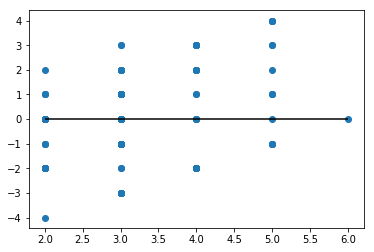

In [20]:
# predict
predictions = model.predict(features_test)
# Plot Residuals
predictions = predictions.round().astype(int)
predictions
target_test = target_test.astype(int)
plt.scatter(predictions, predictions - target_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())

In [21]:
score = model.score(features_test, target_test)
print(f"R2 Score: {score}")

R2 Score: 0.046103046371512524


In [22]:
import sklearn
sklearn.metrics.accuracy_score(target_test,predictions)

0.18072289156626506

In [23]:
print("TRUE => PREDICTED")
actuals = target_test.tolist()
for i in range(len(actuals)):
    print(str(actuals[i]) + "=>" + str(predictions[i]))

TRUE => PREDICTED
1=>3
0=>3
3=>2
6=>4
2=>2
1=>4
2=>3
4=>3
4=>2
3=>3
4=>3
2=>2
4=>3
0=>3
6=>2
2=>2
2=>2
2=>3
2=>3
4=>3
4=>2
4=>2
5=>3
2=>3
4=>4
6=>4
1=>4
4=>2
4=>3
3=>3
4=>3
4=>3
0=>2
2=>2
2=>2
2=>3
2=>3
4=>4
4=>2
4=>3
2=>2
3=>3
4=>3
4=>3
2=>4
4=>5
2=>3
4=>3
2=>4
6=>4
6=>4
4=>5
2=>2
6=>4
6=>4
2=>3
2=>4
2=>3
2=>2
6=>3
1=>5
1=>5
4=>2
2=>3
4=>3
6=>5
4=>3
5=>3
2=>2
2=>3
1=>3
2=>3
2=>3
2=>3
2=>2
1=>5
6=>4
2=>3
4=>4
4=>2
2=>3
4=>2
2=>3
3=>3
6=>4
1=>5
2=>3
2=>5
2=>3
6=>4
2=>3
2=>3
2=>3
2=>3
1=>4
2=>3
6=>4
6=>6
2=>3
1=>4
2=>3
1=>3
6=>3
2=>3
4=>3
4=>3
2=>4
2=>2
4=>2
1=>3
3=>3
2=>2
5=>5
6=>3
3=>3
1=>2
2=>4
2=>3
6=>3
2=>3
2=>3
6=>4
3=>3
2=>3
4=>2
4=>2
6=>4
1=>4
4=>3
3=>3
4=>2
6=>5
4=>5
4=>2
2=>5
6=>4
1=>4
3=>5
2=>3
3=>4
2=>3
6=>5
2=>3
4=>2
3=>3
1=>2
6=>4
2=>3
1=>3
3=>4
6=>4
2=>3
6=>3
2=>3
3=>2
6=>4
3=>2
1=>2
3=>3
4=>3
4=>4
2=>2
2=>3
6=>3
2=>3
6=>5


### Create a data frame of actual and predicted years and then bin both columns separately using the bins and see if the predictions are placed in the correct bins

In [24]:
data_test = pd.DataFrame(data = {"actual": actuals, "predicted": predictions})

In [25]:
data_test.head()

,actual,predicted
0,1,3
1,0,3
2,3,2
3,6,4
4,2,2


In [26]:
# Get the accuracy scores for the bins
sklearn.metrics.accuracy_score(data_test["actual"].astype(str).tolist() , data_test["predicted"].astype(str).tolist())

0.18072289156626506